In [1]:
#Library
#Library 
# basic data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, average_precision_score, plot_precision_recall_curve, plot_roc_curve,confusion_matrix, recall_score, precision_score,f1_score

#models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Data
* _Ukuran data_ yang digunakan adalah *5000 baris (rows) awal [:5000]*.
* _Variabel_ yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [2]:
hotel=pd.read_csv('hotel_bookings.csv')
hotel=hotel[:5000]
hotel=hotel[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


## Data detail
* 'hotel': 
    * H1 = Resort Hotel
    * H2 = City Hotel `There is no City hotel on the first 5000 rows data`
* 'is_canceled': 
    * Booking was canceled (1) `49.56% customer cancel their booking`
    * Booking was not canceled (0)
* 'adults': Number of adults
* 'children': Number of children (BO and BL)
* 'babies': Number of babies (BO and BL)
* 'meal': Type of meal booked. Categories are presented in standard hospitality meal packages:
    * Undefined/SC – no meal package `this part is categorized as 2 category`
    * BB – Bed & Breakfast
    * HB – Half board (breakfast and one other meal – usually dinner)
    * FB – Full board (breakfast, lunch and dinner)
* 'country': Country of origin.
* 'market_segment': Market segment designation. 
    * “TA/TO” means “Travel Agents/Tour Operators” 
    * “Corporate"
    * "Direct"
* 'distribution_channel': Booking distribution channel. 
    * “TA/TO” means “Travel Agents/Tour Operators” 
    * “Corporate"
    * "Direct"
* 'reserved_room_type': Code of room type reserved. Code is presented instead of designation for anonymity reasons
* 'booking_changes': Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* 'deposit_type': Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    * No Deposit – no deposit was made
    * Non Refund – a deposit was made in the value of the total stay cost
    * Refundable – a deposit was made with a value under the total cost of stay
* 'days_in_waiting_list': Number of days the booking was in the waiting list before it was confirmed to the customer
* 'customer_type': Type of booking, assuming one of four categories:
    * Contract - when the booking has an allotment or other type of contract associated to it
    * Group – when the booking is associated to a group
    * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
    * Transient-party – when the booking is transient, but is associated to at least other transient booking
* 'required_car_parking_spaces': Number of car parking spaces required by the customer
* 'total_of_special_requests': Number of special requests made by the customer (e.g. twin bed or high floor)

# Cleaning and EDA
Lakukan data cleaning:
1) cek anomali pada data kalian dan perbaiki sesuai kebutuhan.

Lakukan EDA, selain untuk menentukan skema preprocessing kalian, jalankan Exploratory Data Analysis untuk:  
1) Memahami profil tamu/konsumen hotel (customer profiling).  
2) Memahami kebiasaan tamu/konsumen hotel (customer behavior).  

Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke manajemen hotel!


## Describe and Information

In [3]:
hotel.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [4]:
hotel.describe(include='object')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,4998,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3174,2156,3657,3167,4461,3699


In [5]:
#there is missing value on column country 
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

## Missing Value

The missing value is found on country columns and it just 2 rows, so it will be deleted

In [6]:
hotel[hotel['country'].isna()==True].index

Int64Index([30, 4127], dtype='int64')

In [7]:
hotel=hotel.drop(hotel.index[[30,4127]]).reset_index(drop=True)
hotel.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

## Inconsistency Data

In [8]:
hotel.nunique()

hotel                           1
is_canceled                     2
adults                         14
children                        4
babies                          3
meal                            5
country                        56
market_segment                  6
distribution_channel            3
reserved_room_type              8
booking_changes                 8
deposit_type                    3
days_in_waiting_list            5
customer_type                   4
required_car_parking_spaces     3
total_of_special_requests       5
dtype: int64

In [9]:
#Unique data on market segment is different with data detail on science direct
hotel['market_segment'].value_counts()

Online TA        2156
Groups           1025
Offline TA/TO     928
Direct            617
Corporate         261
Complementary      11
Name: market_segment, dtype: int64

In [10]:
#Unique data on distribution channel is different with data detail on science direct
hotel['distribution_channel'].value_counts()

TA/TO        3656
Direct       1067
Corporate     275
Name: distribution_channel, dtype: int64

In [11]:
hotel.pivot_table(index=['market_segment','distribution_channel'],aggfunc='size')

market_segment  distribution_channel
Complementary   Corporate                  1
                Direct                     8
                TA/TO                      2
Corporate       Corporate                251
                Direct                    10
Direct          Corporate                  1
                Direct                   605
                TA/TO                     11
Groups          Corporate                 22
                Direct                   441
                TA/TO                    562
Offline TA/TO   Direct                     3
                TA/TO                    925
Online TA       TA/TO                   2156
dtype: int64

**Market_segment will follow distribution Channel**  
this way may be not the best way since there is Complementary and Groups segmentation on market segment

In [12]:
comind=hotel[hotel['market_segment']=='Complementary']['market_segment'].index
hotel['market_segment'].loc[comind]=hotel['distribution_channel'].loc[comind]
hotel.loc[comind]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
124,Resort Hotel,0,4,0.0,0,FB,PRT,Direct,Direct,H,2,No Deposit,0,Transient,0,1
1704,Resort Hotel,0,1,0.0,0,BB,PRT,Direct,Direct,C,0,No Deposit,0,Transient,0,0
2239,Resort Hotel,0,2,0.0,0,FB,PRT,Direct,Direct,F,0,No Deposit,0,Transient,0,2
2241,Resort Hotel,0,3,0.0,0,BB,AGO,Direct,Direct,A,1,No Deposit,0,Transient,0,0
2447,Resort Hotel,0,1,0.0,0,HB,PRT,Direct,Direct,E,0,No Deposit,0,Transient,0,3
2594,Resort Hotel,0,1,0.0,0,BB,ESP,TA/TO,TA/TO,F,0,No Deposit,0,Transient,0,1
3255,Resort Hotel,0,2,0.0,0,BB,PRT,Corporate,Corporate,A,1,No Deposit,0,Transient,0,0
3831,Resort Hotel,1,1,0.0,0,BB,PRT,TA/TO,TA/TO,F,0,No Deposit,0,Transient,0,0
4438,Resort Hotel,1,2,0.0,0,BB,PRT,Direct,Direct,A,1,No Deposit,0,Transient,0,0
4440,Resort Hotel,1,2,0.0,0,BB,PRT,Direct,Direct,A,0,No Deposit,0,Transient,0,0


In [13]:
cd_index=hotel[(hotel['distribution_channel']=='Corporate')|(hotel['distribution_channel']=='Direct')|(hotel['distribution_channel']=='TA/TO')].index
hotel['market_segment'].loc[cd_index]=hotel['distribution_channel'].loc[cd_index]
hotel.loc[cd_index]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,TA/TO,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Resort Hotel,1,2,0.0,0,HB,PRT,Direct,Direct,D,0,Non Refund,0,Transient,0,0
4994,Resort Hotel,1,2,0.0,0,HB,PRT,Direct,Direct,D,0,Non Refund,0,Transient,0,0
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Direct,Direct,A,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Direct,Direct,A,0,Non Refund,0,Transient,0,0


In [14]:
hotel.pivot_table(index=['market_segment','distribution_channel'],aggfunc='size')

market_segment  distribution_channel
Corporate       Corporate                275
Direct          Direct                  1067
TA/TO           TA/TO                   3656
dtype: int64

**Delete data when adults, children, and babies equal to 0**  
There is another anomaly on data there is no number of person in 4 booking

In [15]:
delin=hotel[hotel['adults']==0].index
hotel=hotel.drop(index=delin).reset_index(drop=True)

## Customer Profiling & Behaviour

In [16]:
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,TA/TO,TA/TO,A,0,No Deposit,0,Transient,0,1


In [17]:
hotel.groupby('market_segment')['adults','children','babies'].describe()

<ipython-input-17-5fa9b543d956>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hotel.groupby('market_segment')['adults','children','babies'].describe()


adults                                               children  \
                 count      mean       std  min  25%  50%  75%   max    count   
market_segment                                                                  
Corporate        273.0  1.432234  0.503650  1.0  1.0  1.0  2.0   3.0    273.0   
Direct          1067.0  2.147142  2.862696  1.0  2.0  2.0  2.0  55.0   1067.0   
TA/TO           3653.0  1.961675  0.953841  1.0  2.0  2.0  2.0  26.0   3653.0   

                          ...             babies                           \
                    mean  ...  75%   max   count      mean       std  min   
market_segment            ...                                               
Corporate       0.047619  ...  0.0   2.0   273.0  0.010989  0.104442  0.0   
Direct          0.130272  ...  0.0   2.0  1067.0  0.014995  0.129075  0.0   
TA/TO           0.116616  ...  0.0  10.0  3653.0  0.015056  0.121793  0.0   

                                    
                25%  50%  75%  max  
market_segment                      
Corporate       0.0  0.0  0.0  1.0  
Direct          0.0  0.0  0.0  2.0  
TA/TO           0.0  0.0  0.0  1.0  

[3 rows x 24 columns]

In [18]:
hotel.groupby('country')['country'].count().sort_values(ascending=False).head()

country
PRT    3170
ESP     549
GBR     505
IRL     172
FRA     113
Name: country, dtype: int64

In [19]:
hotel.groupby('is_canceled')['is_canceled'].count()/hotel['is_canceled'].count()

is_canceled
0    0.539956
1    0.460044
Name: is_canceled, dtype: float64

In [20]:
cross1=pd.crosstab(hotel['booking_changes'],hotel['is_canceled'],normalize='index').round(2)
cross2=pd.crosstab(hotel['market_segment'],hotel['is_canceled']).round(2)
cross3=pd.crosstab(hotel['deposit_type'],hotel['is_canceled'],normalize=True).round(2)
cross4=pd.crosstab(hotel['days_in_waiting_list'],hotel['is_canceled'],normalize=True).round(2)
cross5=pd.crosstab(hotel['reserved_room_type'],hotel['is_canceled'],normalize='index').round(2)
cross6=pd.crosstab(hotel['meal'],hotel['is_canceled'],normalize='index').round(2)

is_canceled         0     1
booking_changes            
0                0.50  0.50
1                0.74  0.26
2                0.89  0.11
3                0.87  0.13
4                0.89  0.11
5                1.00  0.00
6                1.00  0.00
17               1.00  0.00


<AxesSubplot:xlabel='booking_changes'>

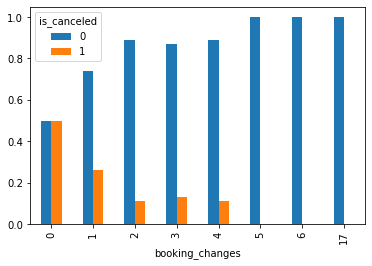

In [21]:
print(cross1)
cross1.plot.bar()

is_canceled        0     1
market_segment            
Corporate        162   111
Direct           613   454
TA/TO           1921  1732


<AxesSubplot:xlabel='market_segment'>

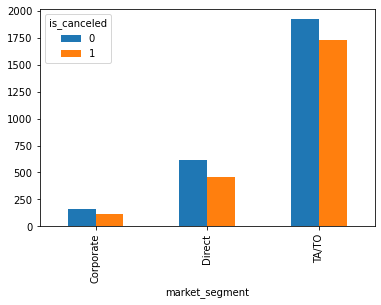

In [22]:
print(cross2)
cross2.plot.bar()

is_canceled      0     1
deposit_type            
No Deposit    0.52  0.37
Non Refund    0.01  0.09
Refundable    0.01  0.00


<AxesSubplot:xlabel='deposit_type'>

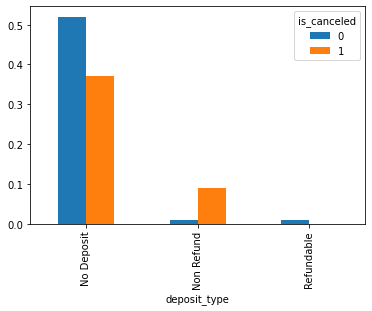

In [23]:
print(cross3)
cross3.plot.bar()

is_canceled              0     1
days_in_waiting_list            
0                     0.52  0.46
47                    0.00  0.00
50                    0.00  0.00
65                    0.00  0.00
122                   0.01  0.00


<AxesSubplot:xlabel='days_in_waiting_list'>

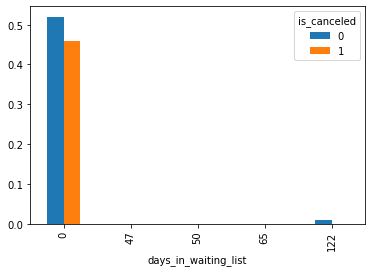

In [24]:
print(cross4)
cross4.plot.bar()

is_canceled            0     1
reserved_room_type            
A                   0.52  0.48
C                   0.63  0.37
D                   0.59  0.41
E                   0.57  0.43
F                   0.67  0.33
G                   0.47  0.53
H                   0.44  0.56
L                   0.67  0.33


<AxesSubplot:xlabel='reserved_room_type'>

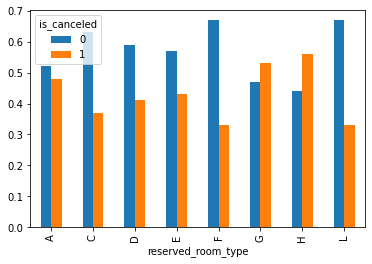

In [25]:
print(cross5)
cross5.plot.bar()

is_canceled     0     1
meal                   
BB           0.56  0.44
FB           0.33  0.67
HB           0.51  0.49
SC           1.00  0.00
Undefined    0.74  0.26


<AxesSubplot:xlabel='meal'>

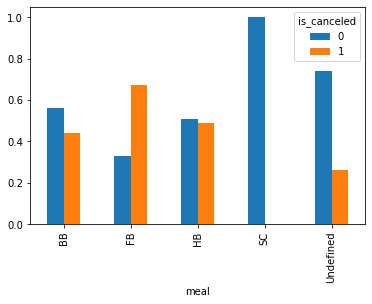

In [26]:
print(cross6)
cross6.plot.bar()

Insight to hotel Management:
* In 1 rooms there is minimal 1 adults, most of the time the customer doesn't bring any children or babies.
* 46% reservation was cancel 
* Higher number of change, lower cancelation
* days_in_waiting_list doesn't have big impact to cancel (just 2/93 customer who cancel)

# Modeling

Dalam konteks bisnis perhotelan, apabila pengunjung diasumsikan tidak cancel booking maka pihak hotel akan menyiapkan beberapa hal untuk menyambut kedatangan mereka, di antaranya:  
>* Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,
>* Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,
>* Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,
>* Menolak pengunjung lain yang memesan kamar yang telah dipesan (booked room), dan
>* Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan. 

##  Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda! 

We will loss, when we predict the customer is not cancel but they cancel the booking. Because we get loss from our preparation to welcoming the customer and also suffer opportunity loss.

## Pilih evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!

We need to reduce false negative, we could use Recall. We try to maximize recall rate because higher recall rate means lower false negative.

## Pilihlah setidaknya 3 model machine learning yang Anda pahami untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan cancel booking atau tidak!
Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

### Preprocessing

In [27]:
hotel1=hotel.drop(columns=['hotel','distribution_channel'])
hotel1.head()

,is_canceled,adults,children,babies,meal,country,market_segment,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,BB,PRT,Direct,C,3,No Deposit,0,Transient,0,0
1,0,2,0.0,0,BB,PRT,Direct,C,4,No Deposit,0,Transient,0,0
2,0,1,0.0,0,BB,GBR,Direct,A,0,No Deposit,0,Transient,0,0
3,0,1,0.0,0,BB,GBR,Corporate,A,0,No Deposit,0,Transient,0,0
4,0,2,0.0,0,BB,GBR,TA/TO,A,0,No Deposit,0,Transient,0,1


In [28]:
cat_features=hotel1.columns[hotel1.dtypes=='object'] #kolom-kolom dengan tipe data string/categorical
cat_features

Index(['meal', 'country', 'market_segment', 'reserved_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')

In [29]:
hotel[cat_features].describe()

,meal,country,market_segment,reserved_room_type,deposit_type,customer_type
count,4993,4993,4993,4993,4993,4993
unique,5,56,3,8,3,4
top,BB,PRT,TA/TO,A,No Deposit,Transient
freq,3417,3170,3653,3161,4454,3696


preprocessing:
* one hot encoding: market_segment,deposit_type,customer_type (data nominal dengan jumlah kategori tidak terlalu banyak)
* binary encoding: meal, country, deposit_type (data nominal dengan jumlah kategori relativ banyak)

In [30]:
transformer=ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),['market_segment', 'deposit_type']),
    ('binary', ce.BinaryEncoder(),['meal', 'country', 'reserved_room_type', 'customer_type']),
], remainder='passthrough')

### Splitting Data

In [31]:
x=hotel1.drop(columns=['is_canceled'])
y=hotel1['is_canceled']

In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 stratify=y,
                                                 random_state=2020)

### Data Transformation

In [33]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer.transform(x_test))

In [34]:
transformer.transformers_[0][1].get_feature_names_out()

array(['market_segment_Direct', 'market_segment_TA/TO',
       'deposit_type_Non Refund', 'deposit_type_Refundable'], dtype=object)

In [35]:
transformer.transformers_[1][1].get_feature_names()

['meal_0',
 'meal_1',
 'meal_2',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2']

In [36]:
x.columns[x.dtypes!=object]

Index(['adults', 'children', 'babies', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [37]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][1].get_feature_names()+list(x.columns[x.dtypes!=object])
features

['market_segment_Direct',
 'market_segment_TA/TO',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'meal_0',
 'meal_1',
 'meal_2',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [38]:
x_train_preprocessed.columns=features
x_test_preprocessed.columns=features

In [39]:
x_train_preprocessed.head()

,market_segment_Direct,market_segment_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,meal_0,meal_1,meal_2,country_0,country_1,country_2,...,customer_type_0,customer_type_1,customer_type_2,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### Choose Model

In [40]:
logreg=LogisticRegression(solver='liblinear', random_state=2020)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(max_depth=5, criterion='entropy')

In [41]:
def model_evaluation_cv(model, metric):
    skfold=StratifiedKFold(n_splits=5)
    return cross_val_score(model, x_train_preprocessed, y_train, cv=skfold, scoring=metric)

In [42]:
def print_result(model_cv):
    print('cv mean', model_cv.mean())
    print('cv std', model_cv.std())

In [43]:
logreg_recall=model_evaluation_cv(logreg,'recall')
knn_recall=model_evaluation_cv(knn,'recall')
tree_recall=model_evaluation_cv(tree,'recall')

In [44]:
print('Logreg')
print_result(logreg_recall)
print('KNN')
print_result(knn_recall)
print('Tree')
print_result(tree_recall)

Logreg
cv mean 0.938447927199191
cv std 0.01059855808363952
KNN
cv mean 0.893727671048197
cv std 0.001455147961068154
Tree
cv mean 0.9168891135827435
cv std 0.07232655757251612


Based on above result Logreg is the best model since it has the higher score and the standard deviation is still low.
The work of this model is similar with linear regression. In this model we categorize result to two classification (cancel or not cancel), based on several features.

In [45]:
logreg=LogisticRegression(solver='liblinear', random_state=2020)
logreg.fit(x_train_preprocessed, y_train) 

LogisticRegression(random_state=2020, solver='liblinear')

In [46]:
y_pred=logreg.predict(x_test_preprocessed)
y_proba= logreg.predict_proba(x_test_preprocessed)

In [47]:
print('Recall', recall_score(y_test,y_pred))

Recall 0.9165217391304348


In [48]:
print(classification_report(y_test,y_pred)) #summary

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       674
           1       0.78      0.92      0.84       575

    accuracy                           0.84      1249
   macro avg       0.85      0.85      0.84      1249
weighted avg       0.85      0.84      0.84      1249



## Setelah Anda memilih benchmark model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! `Parameter` apa saja yang anda pilih untuk `tunning`? Jelaskan maksud dari tiap-tiap parameter tersebut!

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2020,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
logreg_para = {'solver': ['liblinear','newton-cg','lbfgs'],
             'max_iter': [50,100,150]}

In [52]:
skfold=StratifiedKFold(n_splits=5)
logreg1=LogisticRegression(random_state=2020)
grid_search = GridSearchCV(logreg1, logreg_para, cv=skfold, scoring='recall', n_jobs=-1)

In [53]:
grid_search.fit(x_train_preprocessed,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 150],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             scoring='recall')

In [54]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.938447927199191
best param {'max_iter': 50, 'solver': 'liblinear'}


In [55]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040795,0.007709,0.020575,0.005050,50,liblinear,"{'max_iter': 50, 'solver': 'liblinear'}",0.936232,0.933333,0.956395,0.924419,0.941860,0.938448,0.010599,1
3,0.017075,0.001353,0.001006,0.002011,100,liblinear,"{'max_iter': 100, 'solver': 'liblinear'}",0.936232,0.933333,0.956395,0.924419,0.941860,0.938448,0.010599,1
6,0.015842,0.000819,0.002931,0.001767,150,liblinear,"{'max_iter': 150, 'solver': 'liblinear'}",0.936232,0.933333,0.956395,0.924419,0.941860,0.938448,0.010599,1
2,0.068894,0.010234,0.006709,0.002094,50,lbfgs,"{'max_iter': 50, 'solver': 'lbfgs'}",0.936232,0.933333,0.941860,0.924419,0.941860,0.935541,0.006464,4
1,0.073850,0.017390,0.003379,0.002375,50,newton-cg,"{'max_iter': 50, 'solver': 'newton-cg'}",0.936232,0.930435,0.941860,0.924419,0.936047,0.933798,0.005921,5
4,0.052706,0.003348,0.004975,0.003353,100,newton-cg,"{'max_iter': 100, 'solver': 'newton-cg'}",0.936232,0.930435,0.941860,0.924419,0.936047,0.933798,0.005921,5
5,0.045859,0.005949,0.006733,0.001425,100,lbfgs,"{'max_iter': 100, 'solver': 'lbfgs'}",0.936232,0.930435,0.941860,0.924419,0.936047,0.933798,0.005921,5
7,0.053217,0.005163,0.005568,0.002822,150,newton-cg,"{'max_iter': 150, 'solver': 'newton-cg'}",0.936232,0.930435,0.941860,0.924419,0.936047,0.933798,0.005921,5
8,0.040440,0.012696,0.002898,0.002943,150,lbfgs,"{'max_iter': 150, 'solver': 'lbfgs'}",0.936232,0.930435,0.941860,0.924419,0.936047,0.933798,0.005921,5


before vs after tunning

In [56]:
logreg=LogisticRegression(solver='liblinear', random_state=2020)
logreg.fit(x_train_preprocessed, y_train)
y_pred=logreg.predict(x_test_preprocessed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       674
           1       0.78      0.92      0.84       575

    accuracy                           0.84      1249
   macro avg       0.85      0.85      0.84      1249
weighted avg       0.85      0.84      0.84      1249



In [57]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9165217391304348

In [58]:
logreg1=grid_search.best_estimator_
logreg1.fit(x_train_preprocessed,y_train)
y_pred1=logreg1.predict(x_test_preprocessed)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       674
           1       0.78      0.92      0.84       575

    accuracy                           0.84      1249
   macro avg       0.85      0.85      0.84      1249
weighted avg       0.85      0.84      0.84      1249



In [59]:
recall_score(y_test,y_pred1)

0.9165217391304348

## Bagaimana performa model Anda setelah Hyper-parameter Tuning? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan cancel booking atau tidak!

The model performance before Hyper-parameter Tunning is already high, and it doesn't improve after the tunning. So I will use Logreg with Liblinear solver to predict cancelation booking.